# Business Analytics II Assignment I


###### Hektor Dahlberg 2201899

### TODO
- [X]  <a href="#data-understanding">Data Understanding</a>
    - [X] <a href="#imports">Imports</a>
    - [X] <a href="#data-check">Data Check</a>
    - [X] <a href="#data-understanding-preprocess">Preprocess</a>
    - [X] <a href="#data-understanding-statistics">Basic Statistics</a>
    - [X] <a href="#data-understanding-visualisation">Visualisation</a>
    - [X]  <a href="#data-preparation">Data Preparation</a>
- [X]  <a href="#model-building">Model Building</a>
    - [X]  <a href="#model-building-logistic">Logistic Regression Model</a>
    - [X]  <a href="#model-building-decision">Decision Trees Models</a>
    - [X]  <a href="#model-building-bagging">Bagging</a>
    - [X]  <a href="#model-building-forrest">Random forest classifiers</a>



<a id="data-understanding"></a>
## Data Understanding
As part of this step to answer the questions, perform descriptive analysis in Python: calculate basic statistics (e.g., mean, standard deviation, correlation), create some basic visualizations (histogram, boxplots etc.) focusing on the outcome variable. Before this, you will have to perform one-hot encoding for categorical variables.


<a id="imports"></a>
### Imports and installs

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
root = pd.read_csv("churn_dataset.csv")
df = root.copy()

<a id="data-check"></a>
### Data Check
Before starting to do the assignment just to check what the data is about and check how "clean" the data is.

In [2]:
# check df to get a understanding of what we are working with
print(df.shape)
df.head(3)

(6000, 20)


,Customer Gender,Is Senior,Partner,Dependents,Customer Tenure,Has Phone Service,Multiple Lines,Internet Plan,Online Security,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Customer Satisfaction,Churn Label
0,Male,N,N,N,2,Y,N,DSL,Y,N,N,N,N,Month-to-month,Y,Mailed check,53.85,108.15,4,Y
1,Female,N,N,Y,2,Y,N,Fiber optic,N,N,N,N,N,Month-to-month,Y,Electronic check,70.70,151.65,5,Y
2,Female,N,N,Y,8,Y,Y,Fiber optic,N,Y,N,Y,Y,Month-to-month,Y,Electronic check,99.65,820.5,3,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Gender        6000 non-null   object 
 1   Is Senior              6000 non-null   object 
 2   Partner                6000 non-null   object 
 3   Dependents             6000 non-null   object 
 4   Customer Tenure        6000 non-null   int64  
 5   Has Phone Service      6000 non-null   object 
 6   Multiple Lines         6000 non-null   object 
 7   Internet Plan          6000 non-null   object 
 8   Online Security        6000 non-null   object 
 9   Device Protection      6000 non-null   object 
 10  Tech Support           6000 non-null   object 
 11  Streaming TV           6000 non-null   object 
 12  Streaming Movies       6000 non-null   object 
 13  Contract               6000 non-null   object 
 14  Paperless Billing      6000 non-null   object 
 15  Paym

In [4]:
# check for unique values per column
print("number of unique values per column:")
print(df.nunique())
print("----------------------------")

# check if there are null values, empty strings or Nan values and if they exist then in what column they are
empty_columns = []
for column in df.columns:
    
    if df[column].dtype == "object":
        # count empty strings and NaN values
        empty_count = (df[column].str.strip() == "").sum() + df[column].isna().sum() + (df[column].isin(["?", "-"])).sum()
    else:
        # count only NaN values for non-object columns
        empty_count = df[column].isna().sum()

    if empty_count > 0:
        empty_columns.append((column, empty_count))
#print out if any empty/ missing data is found and in which column
if empty_columns:
    print("columns with empty strings or NaN values:")
    for col, count in empty_columns:
        print(f"- {col}: {count} empty strings/NaN values")
else:
    print("Data is gooood")



number of unique values per column:
Customer Gender             2
Is Senior                   2
Partner                     2
Dependents                  2
Customer Tenure            73
Has Phone Service           2
Multiple Lines              3
Internet Plan               3
Online Security             3
Device Protection           3
Tech Support                3
Streaming TV                3
Streaming Movies            3
Contract                    3
Paperless Billing           2
Payment Method              4
Monthly Charges          1513
Total Charges            5575
Customer Satisfaction       5
Churn Label                 2
dtype: int64
----------------------------
columns with empty strings or NaN values:
- Total Charges: 9 empty strings/NaN values


In [5]:
# many columns have more then only Y and N so check out them
#check columns with 3 unique as they only should have 2  + (payment method) 
columns_with_3_unique = ["Multiple Lines", "Internet Plan", "Online Security", "Device Protection",
                         "Tech Support", "Streaming TV", "Streaming Movies", "Contract", "Payment Method"]
# Loop through these columns and print their unique values
for col in columns_with_3_unique:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print() 

Unique values in column 'Multiple Lines':
['N' 'Y' 'No phone service']

Unique values in column 'Internet Plan':
['DSL' 'Fiber optic' 'No']

Unique values in column 'Online Security':
['Y' 'N' 'No internet service']

Unique values in column 'Device Protection':
['N' 'Y' 'No internet service']

Unique values in column 'Tech Support':
['N' 'Y' 'No internet service']

Unique values in column 'Streaming TV':
['N' 'Y' 'No internet service']

Unique values in column 'Streaming Movies':
['N' 'Y' 'No internet service']

Unique values in column 'Contract':
['Month-to-month' 'Two year' 'One year']

Unique values in column 'Payment Method':
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



In [6]:
#check how big part of the data No, and No phone service actually are and if a small portion maybe just drop them
print(df["Internet Plan"].value_counts())
print(df["Multiple Lines"].value_counts())

Fiber optic    2738
DSL            2019
No             1243
Name: Internet Plan, dtype: int64
N                   2879
Y                   2563
No phone service     558
Name: Multiple Lines, dtype: int64


In [7]:
#check for duplicates and drop them
#print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [8]:

df_test = df.copy()
#change Total charges from object to float and if anything that is not a number change it to Nan
df_test["Total Charges"] = pd.to_numeric(df_test["Total Charges"], errors="coerce")
nan_total_charges_df = df_test[df_test["Total Charges"].isna()]
#check what is the reason that they have NaN values
nan_total_charges_df


,Customer Gender,Is Senior,Partner,Dependents,Customer Tenure,Has Phone Service,Multiple Lines,Internet Plan,Online Security,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Customer Satisfaction,Churn Label
2234,Female,N,Y,N,0,N,No phone service,DSL,Y,Y,Y,Y,N,Two year,Y,Bank transfer (automatic),52.55,NaN,4,N
2438,Male,N,N,N,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,20.25,NaN,2,N
2568,Female,N,Y,N,0,Y,N,DSL,Y,Y,N,Y,Y,Two year,N,Mailed check,80.85,NaN,5,N
2667,Male,N,Y,Y,0,Y,Y,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,25.75,NaN,4,N
2856,Female,N,Y,N,0,N,No phone service,DSL,Y,Y,Y,Y,N,Two year,N,Credit card (automatic),56.05,NaN,4,N
4331,Male,N,Y,Y,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,19.85,NaN,5,N
4687,Male,N,Y,Y,0,Y,Y,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,25.35,NaN,3,N
5104,Female,N,Y,Y,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,20.00,NaN,4,N
5719,Male,N,Y,Y,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Y,Mailed check,19.70,NaN,2,N


In [9]:
#check other data with customer tenure = 0 => NaN values are correct as they are from users who only been a customer under a month
df_test.sort_values(by="Customer Tenure").head(10)

,Customer Gender,Is Senior,Partner,Dependents,Customer Tenure,Has Phone Service,Multiple Lines,Internet Plan,Online Security,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Customer Satisfaction,Churn Label
2234,Female,N,Y,N,0,N,No phone service,DSL,Y,Y,Y,Y,N,Two year,Y,Bank transfer (automatic),52.55,NaN,4,N
4687,Male,N,Y,Y,0,Y,Y,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,25.35,NaN,3,N
2438,Male,N,N,N,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,20.25,NaN,2,N
5719,Male,N,Y,Y,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Y,Mailed check,19.70,NaN,2,N
2568,Female,N,Y,N,0,Y,N,DSL,Y,Y,N,Y,Y,Two year,N,Mailed check,80.85,NaN,5,N
2856,Female,N,Y,N,0,N,No phone service,DSL,Y,Y,Y,Y,N,Two year,N,Credit card (automatic),56.05,NaN,4,N
2667,Male,N,Y,Y,0,Y,Y,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,25.75,NaN,4,N
5104,Female,N,Y,Y,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,20.00,NaN,4,N
4331,Male,N,Y,Y,0,Y,N,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,N,Mailed check,19.85,NaN,5,N
752,Male,N,N,N,1,Y,N,DSL,N,N,N,N,N,Month-to-month,Y,Mailed check,45.05,45.05,1,Y


In [10]:
# drop NaN values as they can not even churn yet
#change Total charges from object to float and if anything that is not a number 
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df = df.dropna()
print(df.isnull().values.any())

False


In [11]:
# check out skewness of features
skewness = df.skew(numeric_only=True)
print(skewness)

Customer Tenure          0.291501
Monthly Charges         -0.260408
Total Charges            0.987481
Customer Satisfaction   -0.016846
dtype: float64


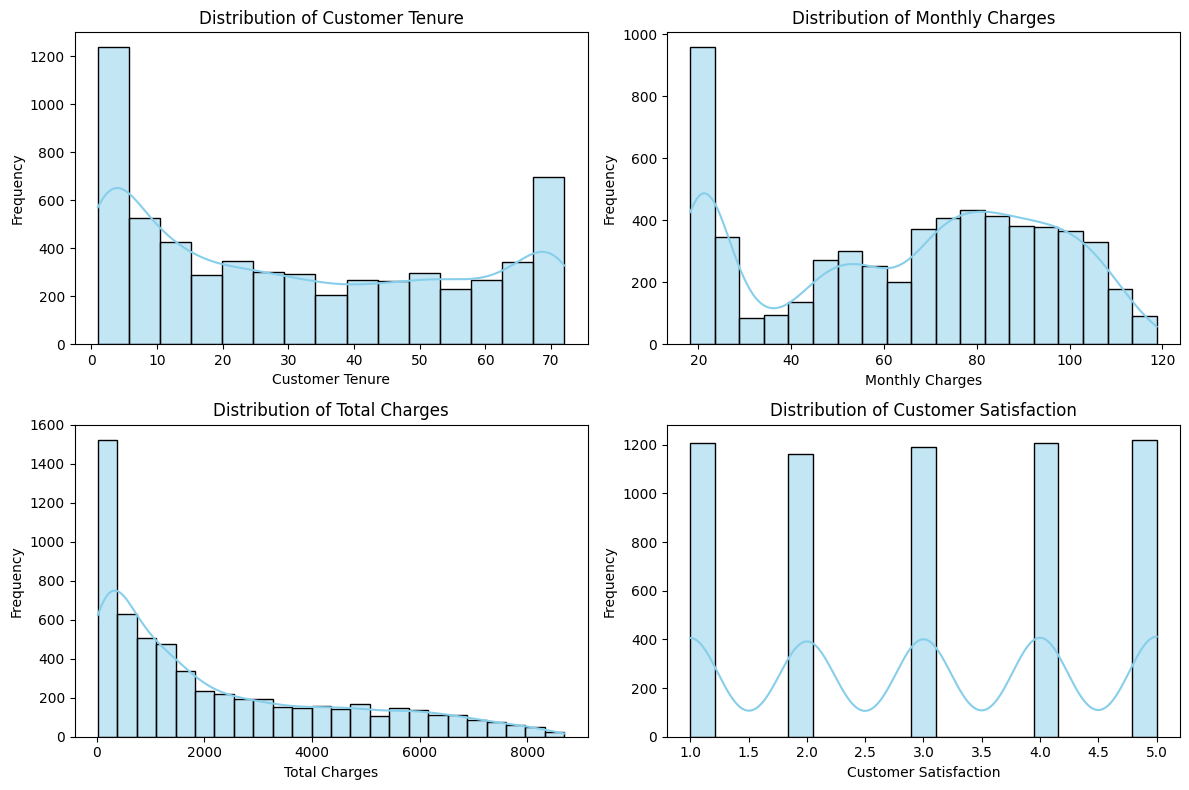

In [12]:
#visualize the skewness
columns_to_plot = ["Customer Tenure", "Monthly Charges", "Total Charges", "Customer Satisfaction"]
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.histplot(df[column], kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<a id="data-understanding-statistics"></a>
## Basic Statistics

In [13]:
# check mean,standard deviation
df.describe()

,Customer Tenure,Monthly Charges,Total Charges,Customer Satisfaction
count,5987.000000,5987.000000,5987.000000,5987.000000
mean,31.504760,65.575447,2241.452263,3.012527
std,24.562475,29.875010,2259.297955,1.420464
min,1.000000,18.250000,18.800000,1.000000
25%,8.000000,40.100000,366.675000,2.000000
50%,27.000000,70.950000,1359.700000,3.000000
75%,54.000000,90.150000,3690.350000,4.000000
max,72.000000,118.750000,8684.800000,5.000000


# market basket analysis

In [14]:

#changes Y and N to 1 and 0
df = df.replace({"Y": 1, "N": 0})
#change gender column to "is male"
df.rename(columns={"Customer Gender":"Is Male"},inplace=True)
df["Is Male"].replace({"Male":1,"Female":0},inplace=True)

In [15]:
#one hot encoding for payment methods
df = pd.get_dummies(df,columns=["Payment Method","Contract"], prefix=["Payment","Contract"])
df.sort_values(by="Customer Tenure").head(2)

,Is Male,Is Senior,Partner,Dependents,Customer Tenure,Has Phone Service,Multiple Lines,Internet Plan,Online Security,Device Protection,...,Total Charges,Customer Satisfaction,Churn Label,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
3226,0,0,1,0,1,1,0,DSL,0,0,...,45.00,3,0,0,0,1,0,1,0,0
2149,1,0,0,0,1,0,No phone service,DSL,0,0,...,25.35,4,0,0,0,0,1,1,0,0


In [16]:
# Make a separate datafram for market basket analysis
df_market = df[df["Internet Plan"] != "No"].copy()
df_market = df_market[["Online Security", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]]
#forgot that mlextend wants bool type
df_market = df_market.astype(bool)
df_market.head(2)
#df_prep_market.info()

,Online Security,Device Protection,Tech Support,Streaming TV,Streaming Movies
0,True,False,False,False,False
1,False,False,False,False,False


In [17]:
#market basket analysis
#frequent items
frequent_itemsets = apriori(df_market, min_support=0.2, use_colnames=True)
#rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="antecedent support", ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Streaming Movies),(Tech Support),0.494318,0.357534,0.217593,0.440187,1.231177,0.040857,1.147645,0.371319
5,(Streaming Movies),(Device Protection),0.494318,0.432029,0.284301,0.575138,1.331251,0.070742,1.336838,0.492062
11,(Streaming Movies),(Streaming TV),0.494318,0.489899,0.352273,0.712644,1.454675,0.110107,1.775152,0.618098
17,(Streaming Movies),"(Device Protection, Streaming TV)",0.494318,0.280724,0.225168,0.455513,1.622637,0.086401,1.321016,0.758815
3,(Streaming TV),(Device Protection),0.489899,0.432029,0.280724,0.573024,1.326357,0.069074,1.330219,0.482365
7,(Streaming TV),(Tech Support),0.489899,0.357534,0.215278,0.439433,1.229067,0.040122,1.146101,0.365369
10,(Streaming TV),(Streaming Movies),0.489899,0.494318,0.352273,0.719072,1.454675,0.110107,1.800042,0.612744
16,(Streaming TV),"(Device Protection, Streaming Movies)",0.489899,0.284301,0.225168,0.459622,1.616672,0.085889,1.324441,0.747784
4,(Device Protection),(Streaming Movies),0.432029,0.494318,0.284301,0.658061,1.331251,0.070742,1.478867,0.438097
1,(Device Protection),(Tech Support),0.432029,0.357534,0.209806,0.485631,1.358280,0.055342,1.249037,0.464415


<a id="data-preparation"></a>
## Data Preparation
As part of this step to answer the questions, perform data preparation in Python.

need to fix skewness and one hot encode, also decide what to with No Phone service, No internet:

Solution:
features Online Security,Device Protection,Tech Support, Streaming TV,Streaming Movies
problem is the interaction with the other featurs:
do df where they are one hot encode in and rermove the extra "No_internet services"
Minmax scale the customer tenure and monthly charges as they have a low skewness
Total charges has a high skewness so will use a log transform for it

In [18]:
# features Online Security,Device Protection,Tech Support, Streaming TV,Streaming Movies
# problem is the interaction with the other featurs:
# do df where they are one hot encode in and rermove the extra "No_internet services"
columns_to_one_hot = df.columns[5:13]
df.columns[5:13]
df =pd.get_dummies(df, columns=columns_to_one_hot, drop_first=False)

In [19]:
df.columns

Index(['Is Male', 'Is Senior', 'Partner', 'Dependents', 'Customer Tenure',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'Customer Satisfaction', 'Churn Label',
       'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
       'Payment_Electronic check', 'Payment_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Has Phone Service_0', 'Has Phone Service_1', 'Multiple Lines_0',
       'Multiple Lines_1', 'Multiple Lines_No phone service',
       'Internet Plan_DSL', 'Internet Plan_Fiber optic', 'Internet Plan_No',
       'Online Security_0', 'Online Security_1',
       'Online Security_No internet service', 'Device Protection_0',
       'Device Protection_1', 'Device Protection_No internet service',
       'Tech Support_0', 'Tech Support_1', 'Tech Support_No internet service',
       'Streaming TV_0', 'Streaming TV_1', 'Streaming TV_No internet service',
       'Streaming Movies_0', 'Streaming M

In [20]:
#need to scale some data
df["Total Charges"] = np.log1p(df["Total Charges"]) 
scaler = MinMaxScaler()
columns_to_scale = ["Customer Tenure", "Monthly Charges","Total Charges"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


<a id="data-understanding-visualisation"></a>
## Visualisation

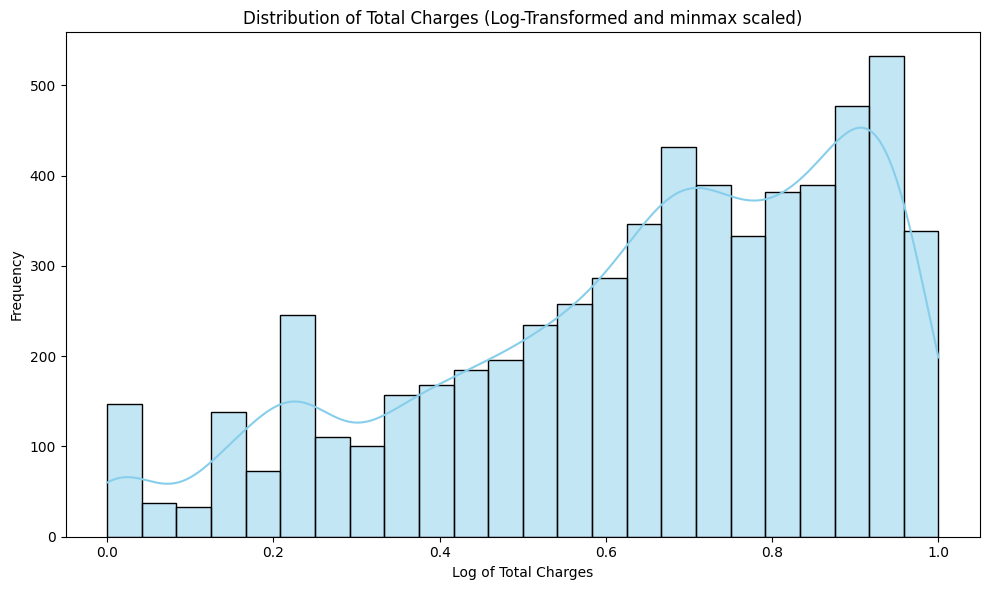

In [38]:
# viaulisation of skewness after scalers
plt.figure(figsize=(10, 6))
sns.histplot(df["Total Charges"], kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of Total Charges (Log-Transformed and minmax scaled)")
plt.xlabel("Log of Total Charges")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

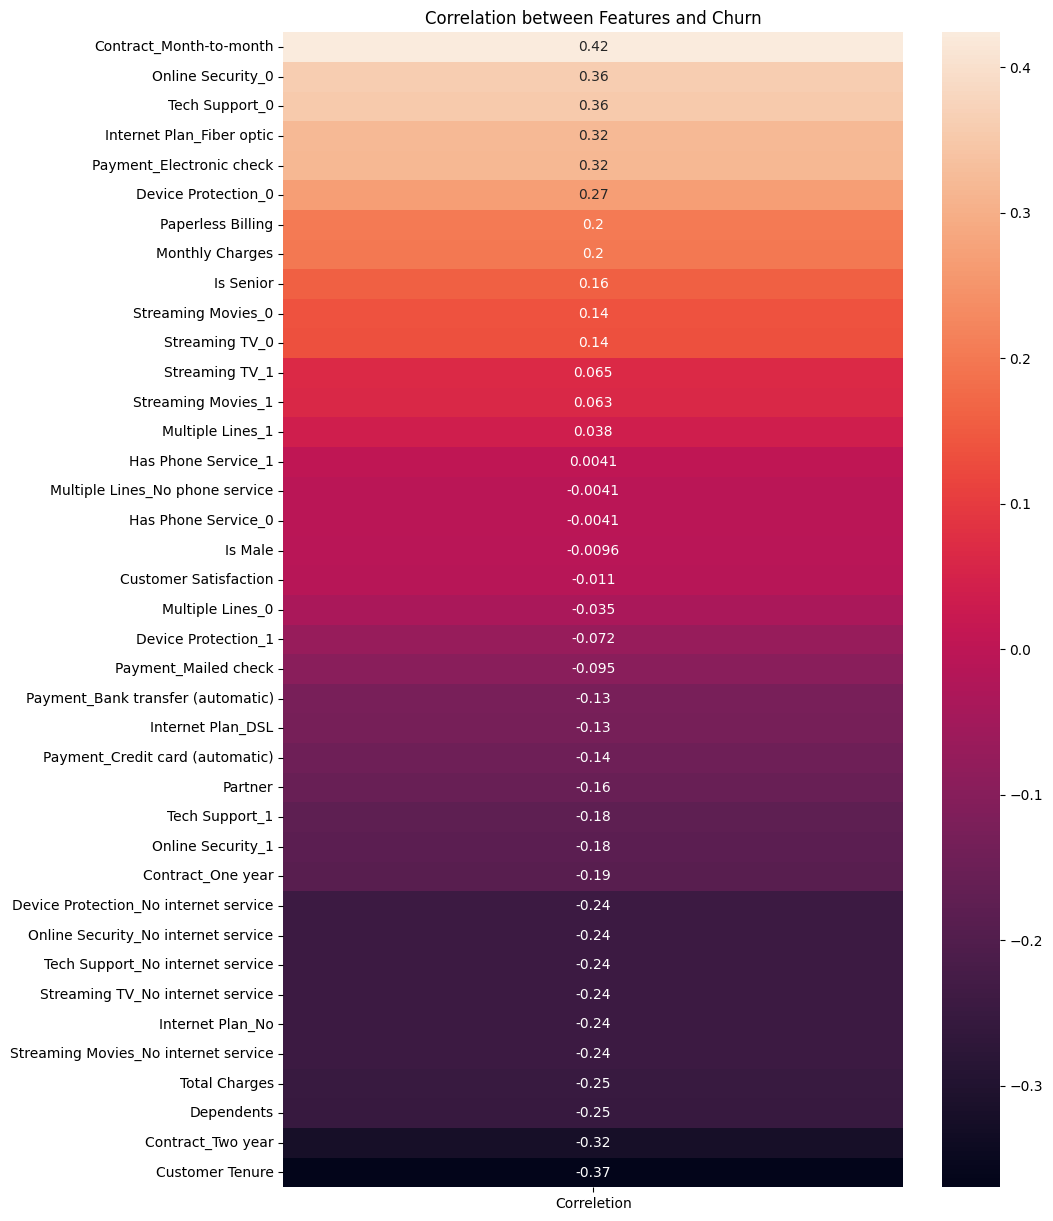

In [22]:
# corelation with chrun
corr_prep = df.copy()
#need to scale some data
df_features_normalized = corr_prep.copy().drop("Churn Label", axis=1)
plt.figure(figsize=(10, 15))
correlations = df_features_normalized.corrwith(corr_prep["Churn Label"]).sort_values(ascending=False)
sns.heatmap(correlations.to_frame(name="Correletion"), annot=True)
plt.title("Correlation between Features and Churn")
plt.show()

In [23]:
# Remove the extra No internet service as to avoid the dummy variable trap
columns_to_drop = [
    "Online Security_No internet service",
    "Device Protection_No internet service",
    "Tech Support_No internet service",
    "Streaming TV_No internet service",
    "Streaming Movies_No internet service",
    "Multiple Lines_No phone service",
]
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['Is Male', 'Is Senior', 'Partner', 'Dependents', 'Customer Tenure',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'Customer Satisfaction', 'Churn Label',
       'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
       'Payment_Electronic check', 'Payment_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Has Phone Service_0', 'Has Phone Service_1', 'Multiple Lines_0',
       'Multiple Lines_1', 'Internet Plan_DSL', 'Internet Plan_Fiber optic',
       'Internet Plan_No', 'Online Security_0', 'Online Security_1',
       'Device Protection_0', 'Device Protection_1', 'Tech Support_0',
       'Tech Support_1', 'Streaming TV_0', 'Streaming TV_1',
       'Streaming Movies_0', 'Streaming Movies_1'],
      dtype='object')

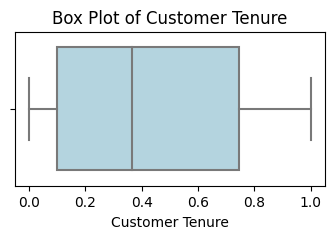

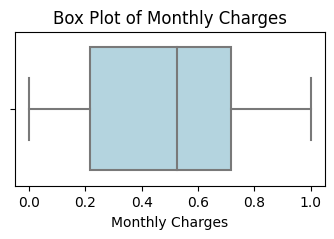

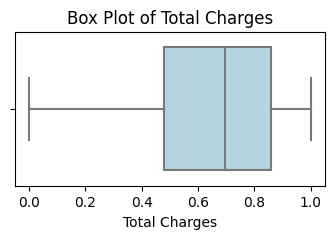

,Is Male,Is Senior,Partner,Dependents,Customer Tenure,Paperless Billing,Monthly Charges,Total Charges,Customer Satisfaction,Churn Label,...,Online Security_0,Online Security_1,Device Protection_0,Device Protection_1,Tech Support_0,Tech Support_1,Streaming TV_0,Streaming TV_1,Streaming Movies_0,Streaming Movies_1


In [32]:
numeric_features = ["Customer Tenure", "Monthly Charges", "Total Charges"]

# Check for outliers using box plots
for feature in numeric_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[feature], color="lightblue")
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    plt.show()
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

#remove outliers if any
df = df[~df.index.isin(outliers.index)]
outliers

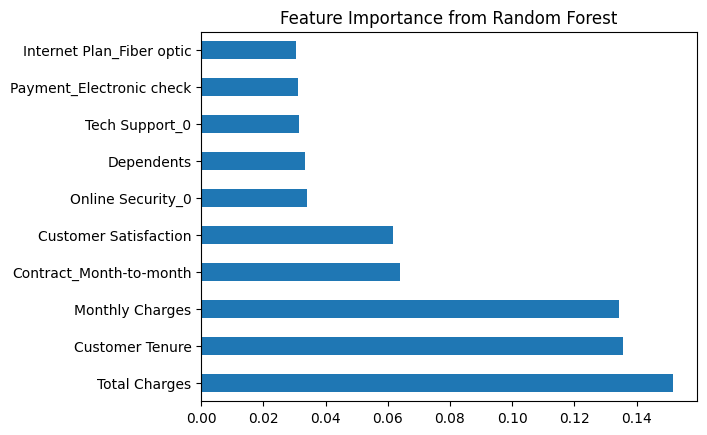

In [33]:
# decide on features to keep and split data into test and train sets
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns=["Churn Label"])  
y = df["Churn Label"]                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind="barh")
plt.title("Feature Importance from Random Forest")
plt.show()

# make a df for only 0.04 to try out if it is better for the models
important_features = feature_importances[feature_importances > 0.04].index.tolist()
df_04 =  df[important_features + ["Churn Label"]]


In [34]:
# extra df to try to reduce noice in data and train models on that
df_demographics= df[["Is Male","Is Senior","Partner","Dependents","Churn Label"]]
df_usage= df[["Customer Satisfaction","Customer Tenure","Monthly Charges","Total Charges","Internet Plan_Fiber optic","Internet Plan_DSL","Internet Plan_No","Churn Label"]]
additional = df[['Has Phone Service_0', 'Has Phone Service_1', 'Multiple Lines_0','Online Security_0', 'Online Security_1','Device Protection_0', 'Device Protection_1', 'Tech Support_0','Tech Support_1', 'Streaming TV_0', 'Streaming TV_1','Streaming Movies_0', 'Streaming Movies_1']]
df_usagev2=  pd.concat([df_usage, additional], axis=1)
df_subscription= df[['Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)','Payment_Electronic check', 'Payment_Mailed check','Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',"Churn Label"]]
df_combined = pd.concat([df_subscription, df_usage.drop(columns=["Churn Label"])], axis=1)

<a id="model-building"></a>
## Model Buildning
As part of this step to answer the questions, build machine learning models introduced in the course
to predict customer churn.

In [35]:
df.columns

Index(['Is Male', 'Is Senior', 'Partner', 'Dependents', 'Customer Tenure',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'Customer Satisfaction', 'Churn Label',
       'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)',
       'Payment_Electronic check', 'Payment_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Has Phone Service_0', 'Has Phone Service_1', 'Multiple Lines_0',
       'Multiple Lines_1', 'Internet Plan_DSL', 'Internet Plan_Fiber optic',
       'Internet Plan_No', 'Online Security_0', 'Online Security_1',
       'Device Protection_0', 'Device Protection_1', 'Tech Support_0',
       'Tech Support_1', 'Streaming TV_0', 'Streaming TV_1',
       'Streaming Movies_0', 'Streaming Movies_1'],
      dtype='object')

<a id="model-building-logistic"></a>
### Logistic regression

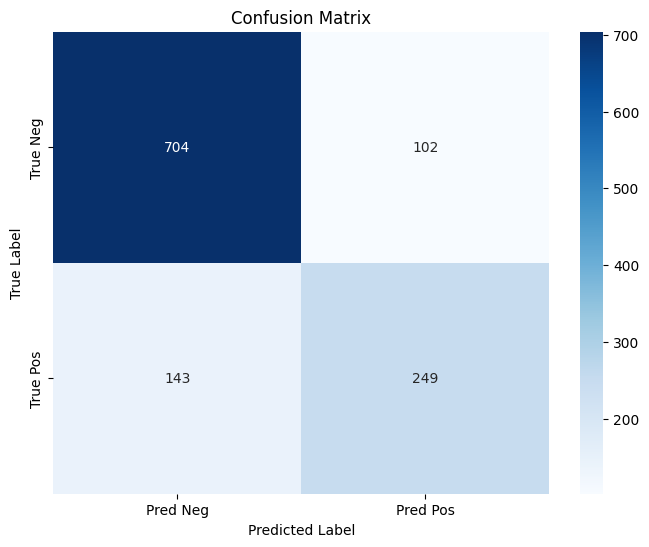

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       806
           1       0.71      0.64      0.67       392

    accuracy                           0.80      1198
   macro avg       0.77      0.75      0.76      1198
weighted avg       0.79      0.80      0.79      1198

Test accuracy: 0.7954924874791319


In [36]:
#X = df_combined.drop(columns=["Churn Label"])  
#y = df_combined["Churn Label"] 
#X = df_subscription.drop(columns=["Churn Label"])  
#y = df_subscription["Churn Label"] 
#X = df_usagev2.drop(columns=["Churn Label"])  
#y = df_usagev2["Churn Label"] 
#X = df_usage.drop(columns=["Churn Label"])  
#y = df_usage["Churn Label"] 
#X = df_demographics.drop(columns=["Churn Label"])  
#y = df_demographics["Churn Label"]  
#X = df_04.drop(columns=["Churn Label"])  
#y = df_04["Churn Label"]  
X = df.drop(columns=["Churn Label"])  
y = df["Churn Label"]                  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report:")
print(class_report)
print("Test accuracy:",accuracy_score(y_test,y_pred))

<a id="model-building-decision"></a>
### Decision Trees

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best accuracy: 0.7765751522086635


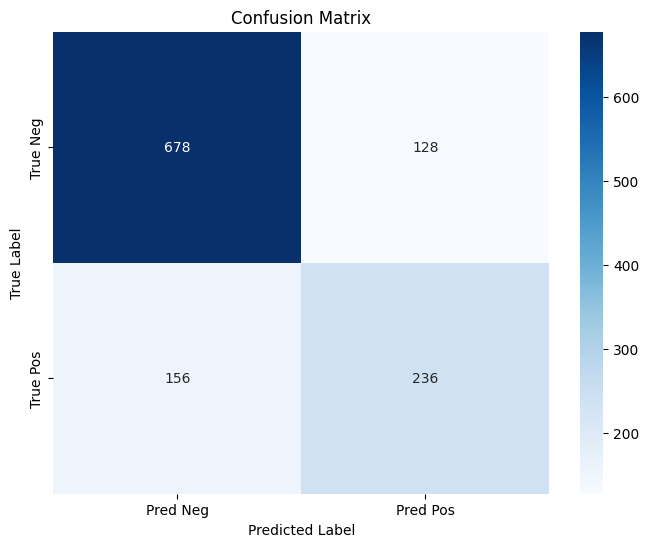

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       806
           1       0.65      0.60      0.62       392

    accuracy                           0.76      1198
   macro avg       0.73      0.72      0.73      1198
weighted avg       0.76      0.76      0.76      1198

Test accuracy: 0.7629382303839732


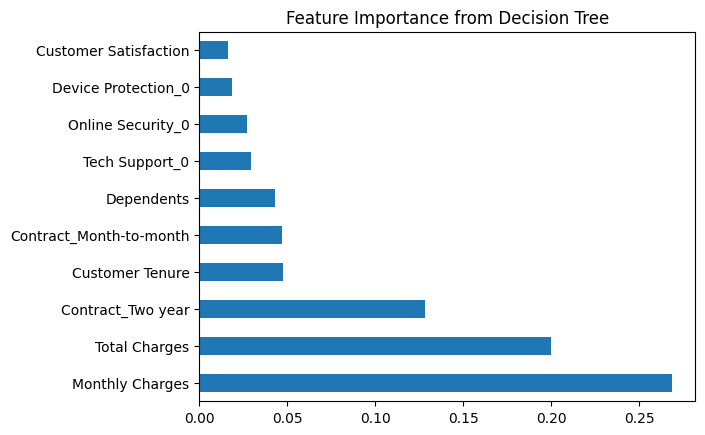

In [37]:
dt_model = DecisionTreeClassifier(random_state=42)
# https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html
# Define parameters for optimization
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2",3,5,10], 
}

# Perform GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid,
                               scoring="accuracy", cv=10, verbose=1, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Decision Tree:")
print(dt_grid_search.best_params_)
print(f"Best accuracy: {dt_grid_search.best_score_}")

# Make predictions on the test set
y_pred_dt = dt_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report:")
print(class_report)
print("Test accuracy:",accuracy_score(y_test,y_pred_dt))

best_dt_model = dt_grid_search.best_estimator_
feature_importances = pd.Series(best_dt_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind="barh")
plt.title("Feature Importance from Decision Tree")
plt.show()

<a id="model-building-bagging"></a>
### Bagging

Fitting 10 folds for each of 162 candidates, totalling 1620 fits

Best parameters for Bagging Classifier:
{'base_estimator__max_depth': 10, 'bootstrap': True, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Best accuracy: 0.791399009442615


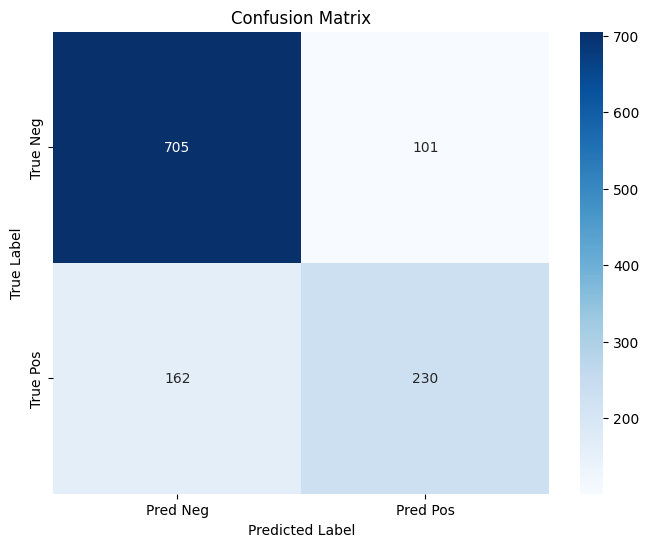

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       806
           1       0.69      0.59      0.64       392

    accuracy                           0.78      1198
   macro avg       0.75      0.73      0.74      1198
weighted avg       0.77      0.78      0.78      1198

Test accuracy: 0.7804674457429048


In [30]:
# Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

bagging_param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "bootstrap": [True, False],
    "base_estimator__max_depth": [None, 10, 20]
}
 
bagging_grid_search = GridSearchCV(estimator=bagging_model, param_grid=bagging_param_grid,
                                    scoring="accuracy", cv=10, verbose=1, n_jobs=-1)
bagging_grid_search.fit(X_train, y_train)


print("\nBest parameters for Bagging Classifier:")
print(bagging_grid_search.best_params_)
print(f"Best accuracy: {bagging_grid_search.best_score_}")

y_pred_bagging = bagging_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_bagging)
conf_matrix = confusion_matrix(y_test, y_pred_bagging)
class_report = classification_report(y_test, y_pred_bagging)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report:")
print(class_report)
print("Test accuracy:",accuracy_score(y_test,y_pred_bagging))

<a id="model-building-forrest"></a>
### Random forest classifiers

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits

Best parameters for Random Forest Classifier:
{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.7936963338894664


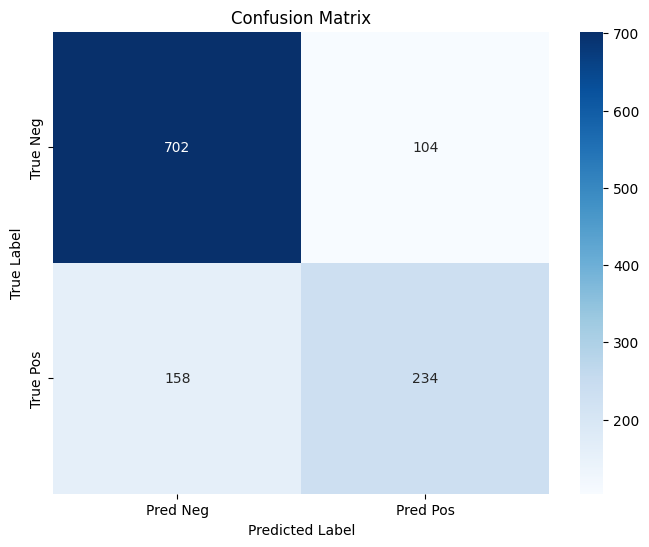

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       806
           1       0.69      0.60      0.64       392

    accuracy                           0.78      1198
   macro avg       0.75      0.73      0.74      1198
weighted avg       0.78      0.78      0.78      1198

Test accuracy: 0.7813021702838063


In [31]:
rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2",3,5,10],
    "bootstrap": [True, False]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               scoring="accuracy", cv=10, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("\nBest parameters for Random Forest Classifier:")
print(rf_grid_search.best_params_)
print(f"Best accuracy: {rf_grid_search.best_score_}")

y_pred_rf = rf_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report:")
print(class_report)
print("Test accuracy:",accuracy_score(y_test,y_pred_rf))